In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_ref_until_2020-02-13.csv')


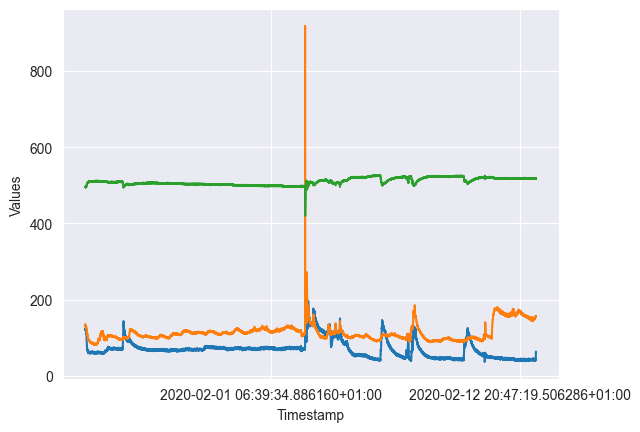

In [3]:
plt.plot(df['timestamp'], df['CO2CosIRValue'])
plt.plot(df['timestamp'], df['COValue'])
plt.plot(df['timestamp'], df['CO2MG811Value'])
# plt.title('Temperature and Humidity Plot for First 100 Data Points')
plt.xticks(["2020-02-01 06:39:34.886160+01:00","2020-02-12 20:47:19.506286+01:00"],["2020-02-01 06:39:34.886160+01:00","2020-02-12 20:47:19.506286+01:00"])
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.show()

In [5]:
df_scatter = pd.read_csv('Bone Tumor Dataset.csv')

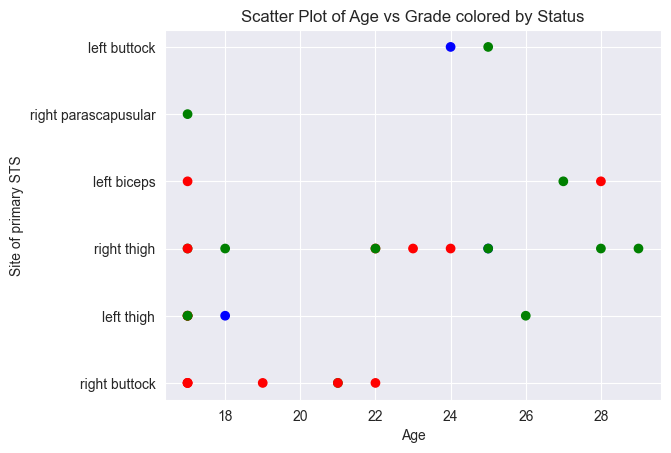

In [8]:
colors = {'NED': 'green', 'AWD': 'blue', 'D': 'red'}
df_sorted = df_scatter.sort_values(by='Age')
df_under_30 = df_sorted[df_sorted['Age'] < 30]
plt.scatter(df_under_30['Age'], df_under_30['Site of primary STS'], color = df_under_30['Status (NED, AWD, D)'].map(colors))
# plt.legend(title="Status (NED, AWD, D)", title_fontsize=13, loc="upper right")
plt.xlabel('Age')
plt.ylabel('Site of primary STS')
plt.title('Scatter Plot of Age vs Grade colored by Status')
plt.show()

In [11]:
df_bar_chart = pd.read_csv('bar.csv')

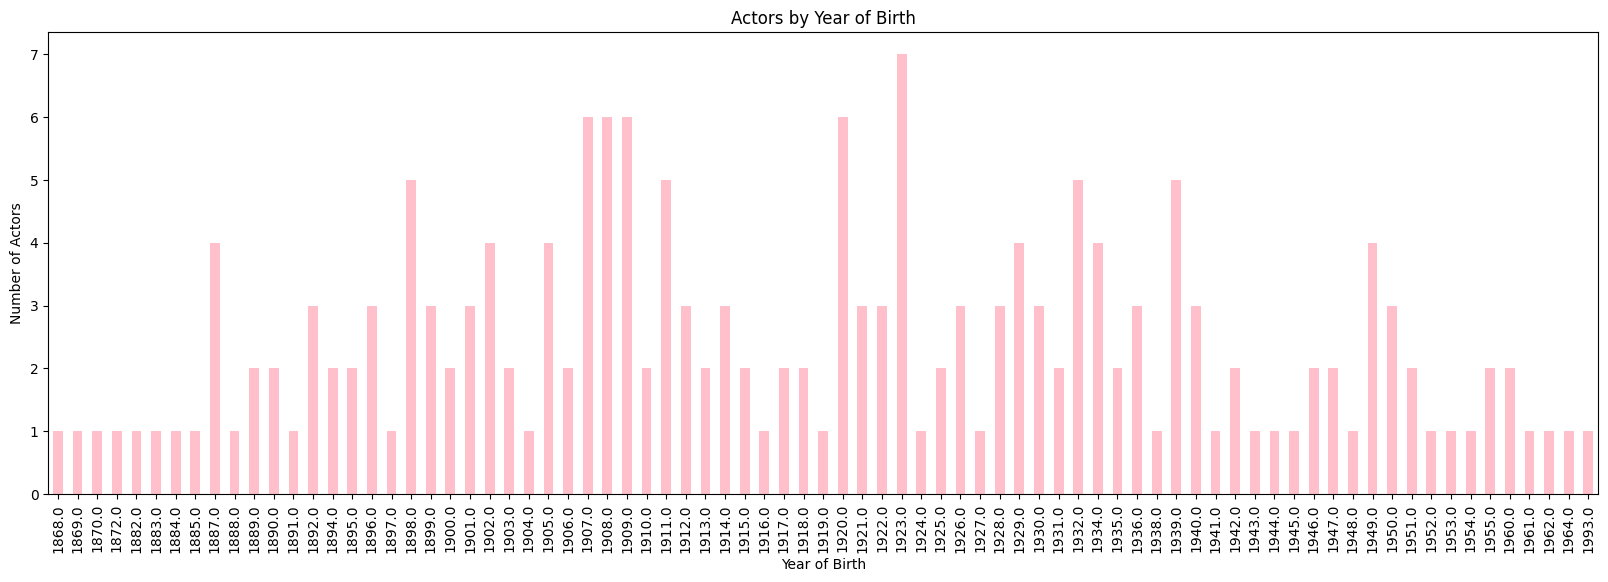

In [54]:
df_bar_chart = df_bar_chart.dropna(subset=['dob'])
df_bar_chart['dob'] = pd.to_numeric(df_bar_chart['dob'], errors='coerce')
actor_counts = df_bar_chart.groupby('dob')['dob'].count()
plt.figure(figsize=(20, 6))
actor_counts.plot(kind='bar', color='pink')
plt.xlabel('Year of Birth')
plt.ylabel('Number of Actors')
plt.title('Actors by Year of Birth')
plt.show()

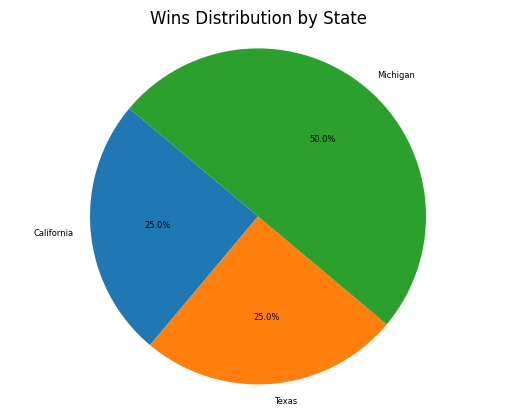

In [91]:
wins_by_state = {}
labelss = ['California', 'Texas','Michigan']
with open('BCSgames.txt', 'r') as file:
    for line in file:
        parts = line.split(',')
        winner_team = parts[2].strip() if float(parts[3]) > float(parts[9]) else parts[8].strip()
        team1_state = parts[2].strip()
        team2_state = parts[8].strip()
        if winner_team == team1_state:
            wins_by_state[team1_state] = wins_by_state.get(team1_state, 0) + 1
        elif winner_team == team2_state:
            wins_by_state[team2_state] = wins_by_state.get(team2_state, 0) + 1
labels = [state for state in labelss if state in wins_by_state]

sizes = [wins_by_state[state] for state in labels]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 6})
plt.axis('equal')
plt.title('Wins Distribution by State')

plt.show()


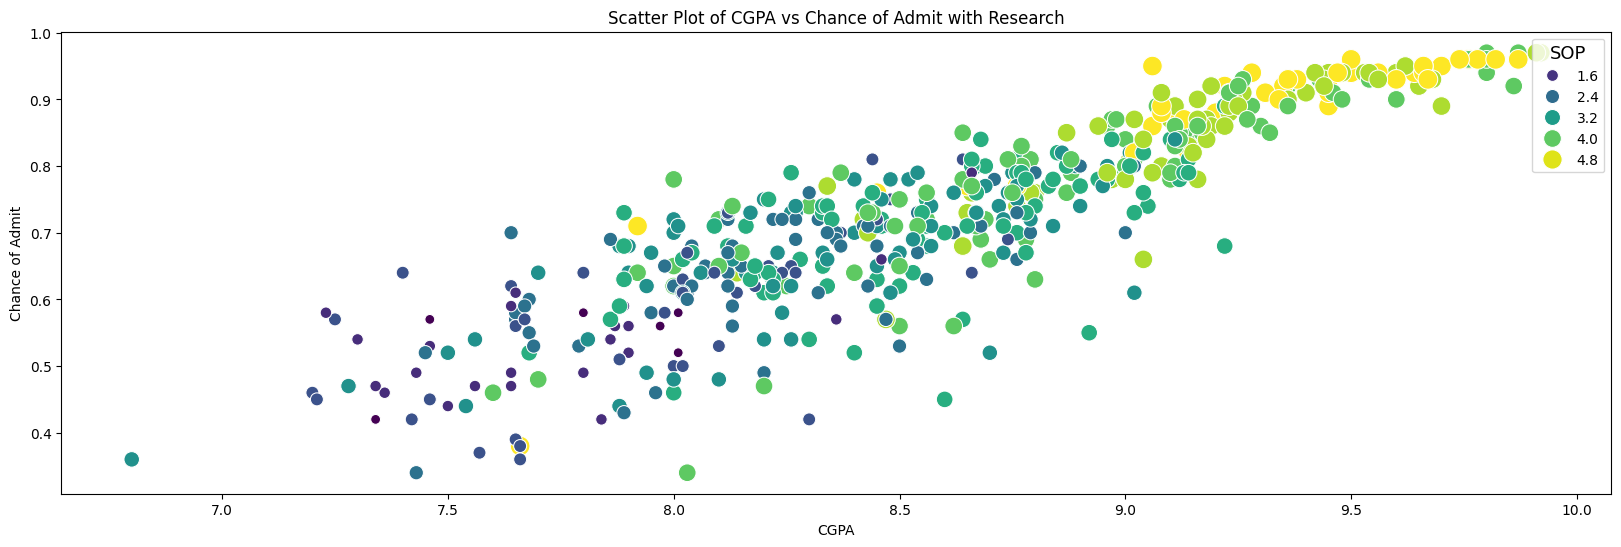

In [24]:
data_sna = pd.read_csv('admission_data.csv')
# print(data_sna.columns)
data_sna = data_sna.rename(columns={"Chance of Admit ": "Chance of Admit"})
plt.figure(figsize=(20, 6))
sns.scatterplot(data=data_sna, x="CGPA", y='Chance of Admit', hue="SOP", palette="viridis", size="SOP", sizes=(50, 200))
plt.legend(title="SOP", title_fontsize=13, loc="upper right")
plt.xlabel("CGPA")
plt.ylabel("Chance of Admit")
plt.title("Scatter Plot of CGPA vs Chance of Admit with Research")
plt.show()


In [34]:
df_apple = pd.read_csv('apple_quality.csv')

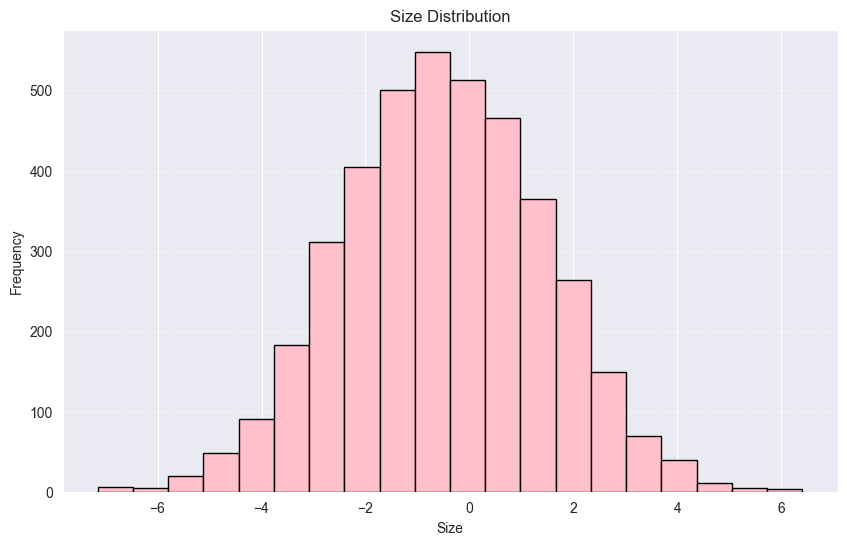

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df_apple['Size'], bins=20, color='pink', edgecolor='black')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('Size Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


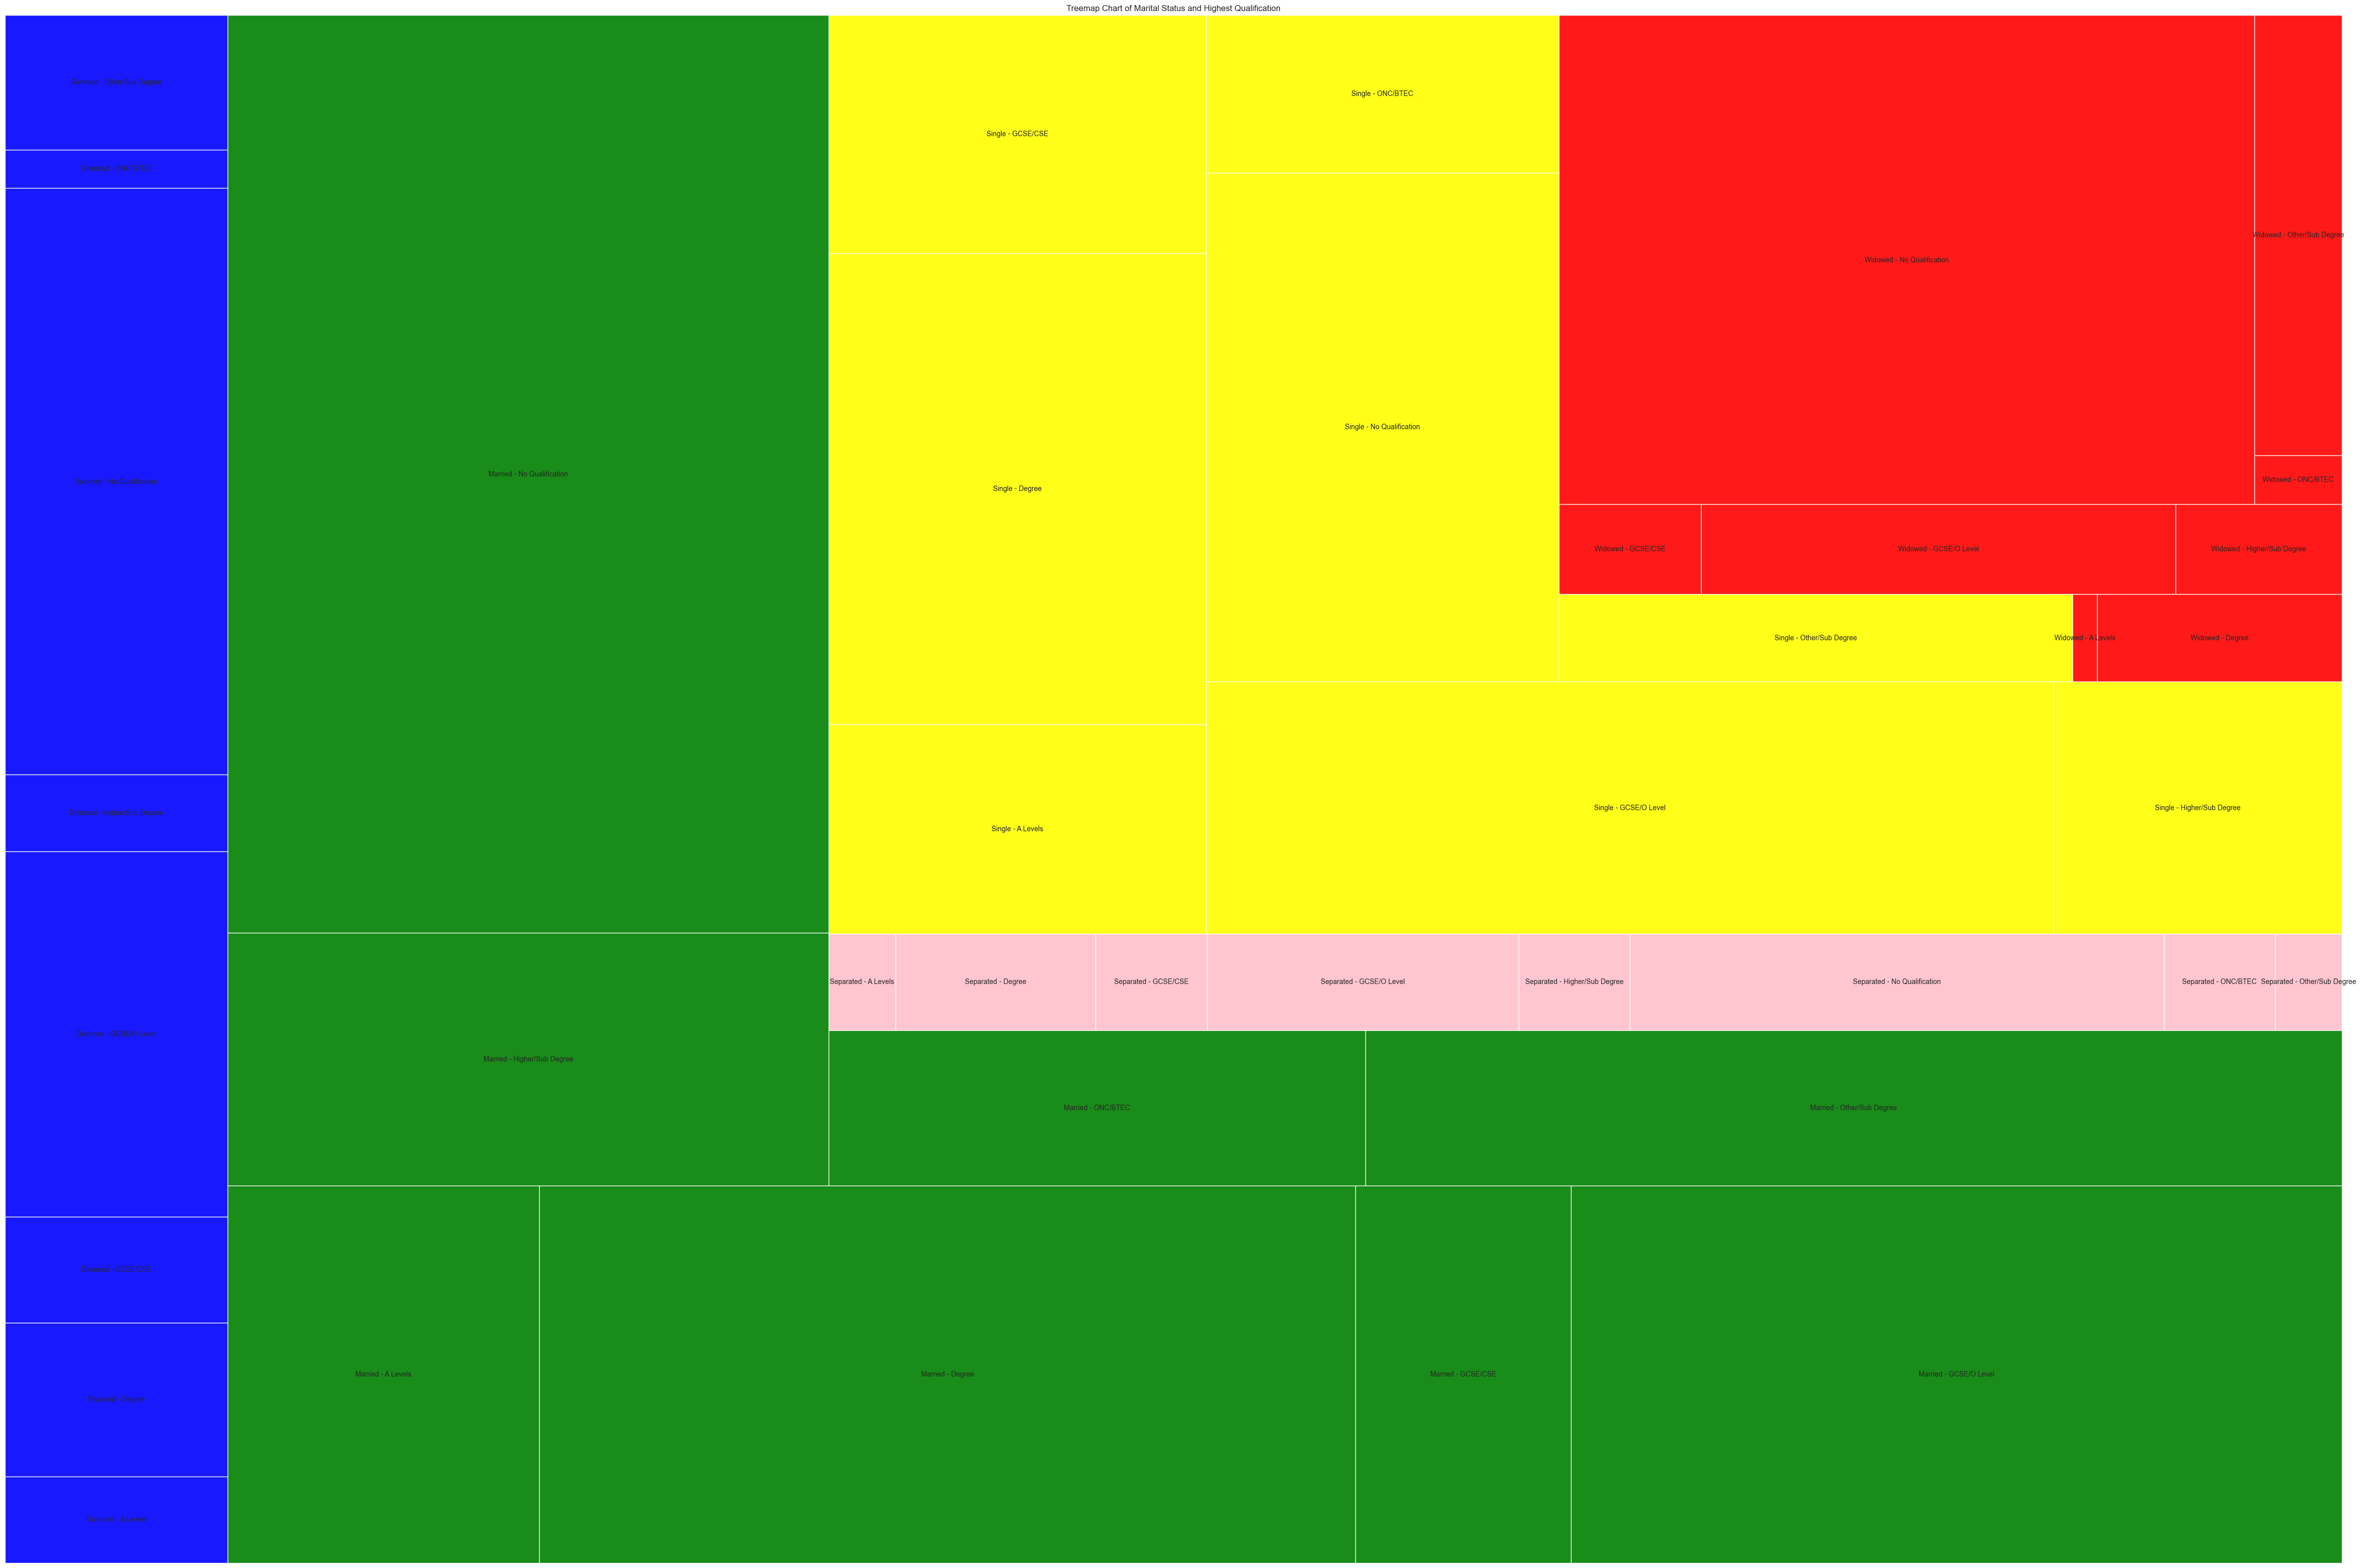

In [41]:
import squarify

df_tree = pd.read_csv('smoking.csv')

color_dict = {
    'Single': 'yellow',
    'Married': 'green',
    'Divorced': 'blue',
    'Separated':'pink',
    'Widowed':'red'
}
count_df = df_tree.groupby(['marital_status', 'highest_qualification']).size().reset_index(name='count')
count_df = count_df.sort_values(['marital_status', 'highest_qualification'])
plt.figure(figsize=(60, 40))
squarify.plot(sizes=count_df['count'], label=count_df['marital_status'] + ' - ' + count_df['highest_qualification'], color=[color_dict[status] for status in count_df['marital_status']], alpha=0.9)
plt.axis('off')
plt.title("Treemap Chart of Marital Status and Highest Qualification")

plt.show()


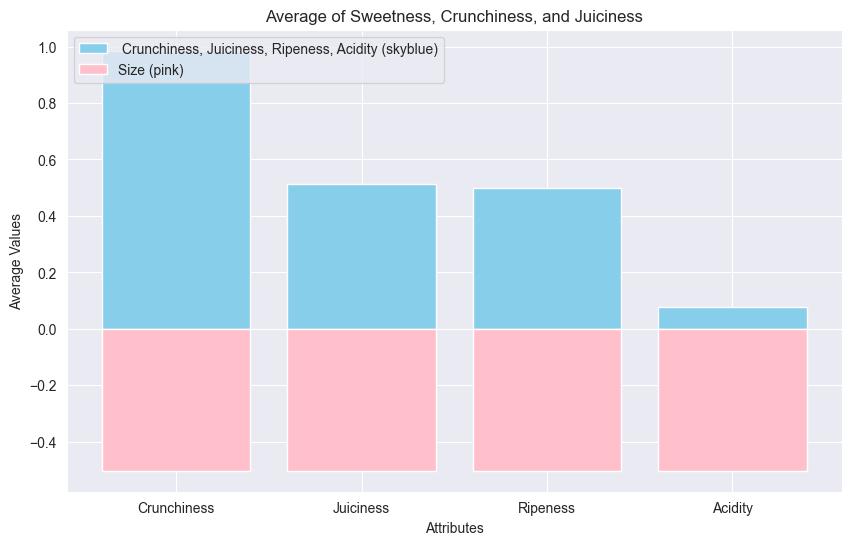

In [56]:
import matplotlib.pyplot as plt
avg_values = df_apple[[ 'Crunchiness', 'Juiciness','Ripeness','Acidity']].mean()
plt.figure(figsize=(10, 6))
bar1=plt.bar(avg_values.index, avg_values.values, color='skyblue')
bar2=plt.bar(avg_values.index, df_apple['Size'].mean(), color='pink')
plt.xlabel('Attributes')
plt.ylabel('Average Values')
plt.title('Average of Sweetness, Crunchiness, and Juiciness')
plt.legend(handles=[bar1, bar2], labels=[' Crunchiness, Juiciness, Ripeness, Acidity (skyblue)', 'Size (pink)'], loc='upper left')
plt.show()


In [59]:
import plotly.express as px
df_car= pd.read_csv('data.csv')
fig = px.parallel_coordinates(df_car, color="MSRP", labels={"MSRP": "Price", "year": "Year"},
                              color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

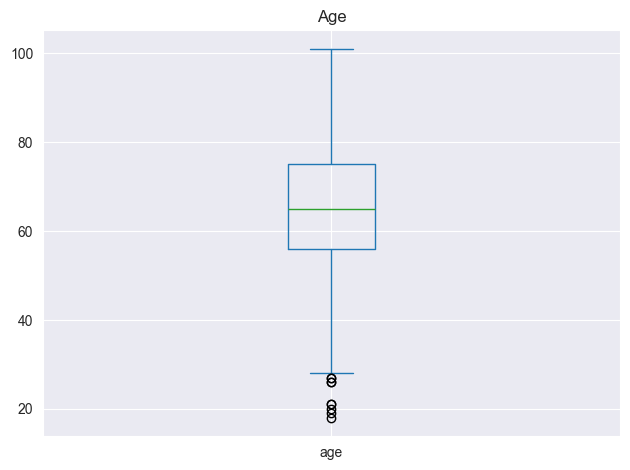

In [2]:
df_box = pd.read_csv('Billionaires Statistics Dataset.csv')
# fig, axs = plt.subplots(2, 2, figsize=(15, 10))
# df_box['gdp_country'].head(100).plot(kind='box', ax=axs[0, 0], title='GDP Country')
# df_box['cpi_country'].plot(kind='box', ax=axs[0, 1], title='CPI Country')
# df_box['total_tax_rate_country'].plot(kind='box', ax=axs[1, 0], title='Total Tax Rate Country')
df_box['age'].plot(kind='box',title='Age')
plt.tight_layout()
plt.show()


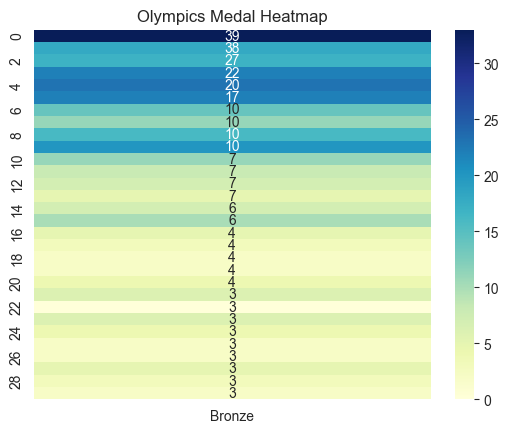

In [28]:
df_heat = pd.read_csv('Medals.csv', encoding='latin1')
sns.heatmap(df_heat[['Bronze']].head(30), annot=df_heat[['Gold']].head(30), fmt="", cmap="YlGnBu")
plt.title("Olympics Medal Heatmap")
plt.show()


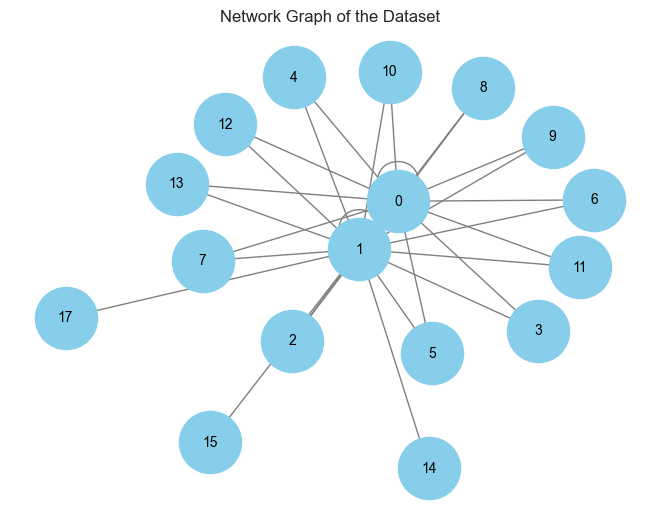

In [32]:
import networkx as nx
df_net = pd.read_csv('diabetes.csv')
G = nx.from_pandas_edgelist(df_net, source='Pregnancies', target='Outcome')
# plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', font_size=10)
plt.title('Network Graph of the Dataset')
plt.show()

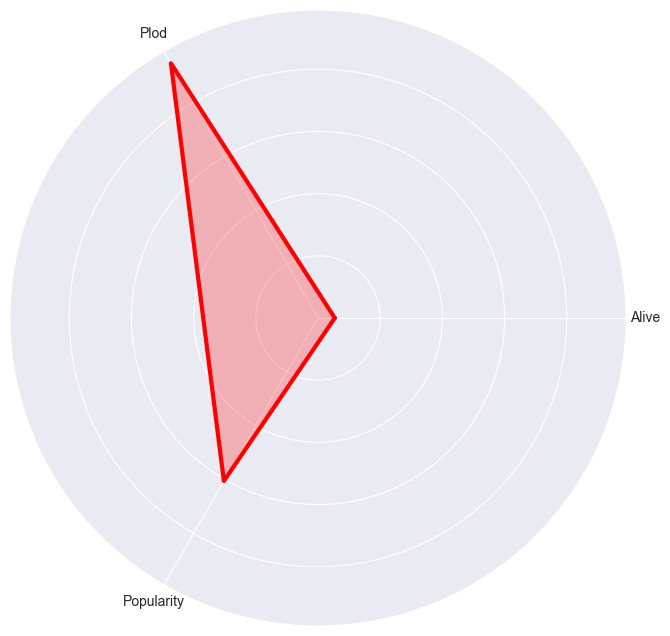

In [38]:
import numpy as np
df_radar= pd.read_csv('character-predictions.csv')
labels = ['Alive', 'Plod', 'Popularity']
values = df_radar[['alive', 'plod', 'popularity']].iloc[0].tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
values += values[:1]
angles += angles[:1]
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})
ax.fill(angles, values, color='red', alpha=0.25)
ax.plot(angles, values, color='red', linewidth=3)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.show()

In [4]:
import plotly.graph_objects as go
df_san = pd.read_csv('energy_dataset.csv')
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = df_san['generation biomass'].head(100).tolist(),
      color = "blue"
    ),
    link = dict(
            source = df_san['generation biomass'].head(100).tolist(),
            target = df_san['generation fossil brown coal/lignite'].head(100).tolist(),
            value = df_san['generation fossil gas'].head(100).tolist()
  ))])
fig.update_layout(title_text="Basic Sankey Diagram", font_size=20)
fig.show()

In [75]:
import plotly.express as px
import pandas as pd
import numpy as np
df = pd.read_csv('Dataset (2).data', header=None, delim_whitespace=True)
df.columns = ['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11', 'Column12', 'Column13', 'Column14', 'Column15']
df['Column3'] = pd.to_numeric(df['Column3'], errors='coerce')
df['Column1'] = pd.to_numeric(df['Column1'], errors='coerce')
fig = px.treemap(df.head(100), path=['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11', 'Column12', 'Column13', 'Column14', 'Column15'],
                 values='Column3',
                 hover_data=['Column1'],
                 color_continuous_scale='RdBu',
                 color_continuous_midpoint=np.average(df['Column1'].head(100), weights=df['Column3'].head(100)))
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()
